#  Activity 1. K-Nearest Neighbour Classifier
### Background
In this activity, we learn how <a href="https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/">K-Nearest Neighbors (KNN)</a> classifier works. KNN is a simple non-parametric model (ironically non-parametric here means infinite number of parameters), which is an example of <a href="https://en.wikipedia.org/wiki/Instance-based_learning">instance-based</a> supervised learning. We will use KNN as a vehicle to practice some of the basic concepts of machine learning. KNN is a <a href="https://en.wikipedia.org/wiki/Lazy_learning">lazy learner</a> that stores all training data points and their labels in memory, and predict the class label for a new data point based on its similarity to the training data (in fact the stored training data points can be considered as parameters).

Consider a training dataset containing (x,t) pairs where $x$ is the input and $t$ is the target class label. Suppose we are given a similarity measure $sim(x_1,x_2)$ which gives the similarity score when fed with two data points. Given a test data point x, the K-nearest neighbour classifier works as follows:
<ul>
	<li>Select the top K most similar data points to x from the training set</li>
	<li>Look at the label of the K-nearest neighbours and select the label which has the majority vote.</li>
</ul>
If the classes are equally common among the neighbours (e.g., two positive and two negative neighbours in binary classification when K=4), the test datapoint is randomly assigned to one of the classes. For example, Figure <strong>A.1</strong> (below) illustrates such situation where the test datapoint (shown by <span style="color: #00ff00;">green</span>) has exactly two neighbours from each class (marked by <span style="color: #ff0000;">red</span> and <span style="color: #3366ff;">blue</span>).

<a href="http://www.saedsayad.com/k_nearest_neighbors.htm" rel="attachment wp-att-92100"><img class="wp-image-92100 size-full" src="https://www.alexandriarepository.org/wp-content/uploads/20160413152921/A.1.png" alt="Figure A.1: KNN for Classification. The green dot indicates a sample with an unknown class label, while red and blue samples are training observation from default and non-default classes, respectively. Source: http://www.saedsayad.com/k_nearest_neighbors.htm" width="497" height="274" /></a> 

> Figure A.1: KNN for Classification. The green dot indicates a sample with an unknown class label, while red and blue samples are training observation from default and non-default classes, respectively. Source: http://www.saedsayad.com/k_nearest_neighbors.htm

### Further Materials
This short <a href="https://www.youtube.com/watch?v=UqYde-LULfs">YouTube video</a> explains KNN and related concepts in a very simple language.

# Steps for Activity 1
<ol>
	<li>Load the iris dataset and divide it to separate training and testing sets,</li>
    <li>Define a function that calculates the majority vote,</li>
    <li>Define KNN function that takes training labeled samples, testing samples, $K$ and a distance metric and predicts the class labels for the testing samples,</li>
	<li>Apply KNN where for some values of $K$ and report training and testing error</li>
	<li>Plot training and testing error versus $1/K$ where $K \in \{1,\cdots,100\}$</li>
</ol>

# Implementation of the Above Steps
Here, we implement a basic KNN classifier. Note that in Assignment 1, you will be asked to expand this implementation and build a KNN regressor. In this task, we use a simple, yet very popular, dataset to investigate the performance of our KNN. 

### Load and Explor Data
Let us start with loading the libraries and dataset.

In [1]:
install.packages("reshape2")
install.packages("ggplot2")
install.packages("corrplot")

install.packages("Cairo")
#a few visualizations wont hurt!
## the followin plot illustrates petal measurments:

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(reshape2)
library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


In [3]:
# Load data: it's built in to R, however, you can also get it online
# iris <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"), header = FALSE)
library(datasets)

In [4]:
data(iris)
# take a look at the data
head(iris)
# Shown are 4 measurements (petal & sepal width & length) for 3 species of iris flowers, where sepal is: 
# "One of the usually separate, green parts that surround and protect the flower bud" (or petals)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [5]:
dim(iris) # 150 x 5 records

[1] 150   5

* `ggtitle(label, subtitle = NULL)`: Add title to as caption to provide information about the data
More about labeling see: [Modify axis, legend, and plot labels](https://ggplot2.tidyverse.org/reference/labs.html)

* `geom_point()`: used to create scatterplots.
> `geom_point(mapping = NULL, data = NULL, stat = "identity",
  position = "identity", ..., na.rm = FALSE, show.legend = NA,
  inherit.aes = TRUE)`  
  a. `mapping`: Set of aesthetic mappings created by `aes()`. 
  b. `data`: The data to be displayed in this layer.  1) `NULL`:inherited from `ggplot`. 2) `data.frame`: override the plot data. 3) `function`: the return value must be `data.frame`
  c. `stat`: (string) The statistical transformation to use on the data for this layer
  d. `position`: (string) position adjustment
  e. `...`: other arguments passed on to `layer()`, like `color`
  f. `na.rm`: `FALSE` removes missing values with warning, `TRUE`: silently removed.
  g. `show.legend`: `NA` includes any aesthetics mappings, `FALSE` never includes, `TRUE` always includes
  h. `inherit.aes`: `FALSE` overrides default aesthetics, rather than combining with them

More Example for `aes()` in `geom_point()` see: [Understanding Aesthetic mappings with examples](https://ggplot2.tidyverse.org/reference/geom_point.html)

* `geom_rug()`: rug plot supplement a 2d display with the two 1d marginal distributions. Best used with smaller datasets
> geom_rug(mapping = NULL, data = NULL, stat = "identity",
  position = "identity", ..., sides = "bl", na.rm = FALSE,
  show.legend = NA, inherit.aes = TRUE)  
  a. `sides`: (string) controls which sides of the plot the rugs appear on. `t` top, `r` right, `b` bottom, `l` left.

* `theme_minimal()`: control all non-data display.  
More existing themes see: [Complete themes](https://ggplot2.tidyverse.org/reference/ggtheme.html)
> use `theme()` if you want to tweak the display on existing theme

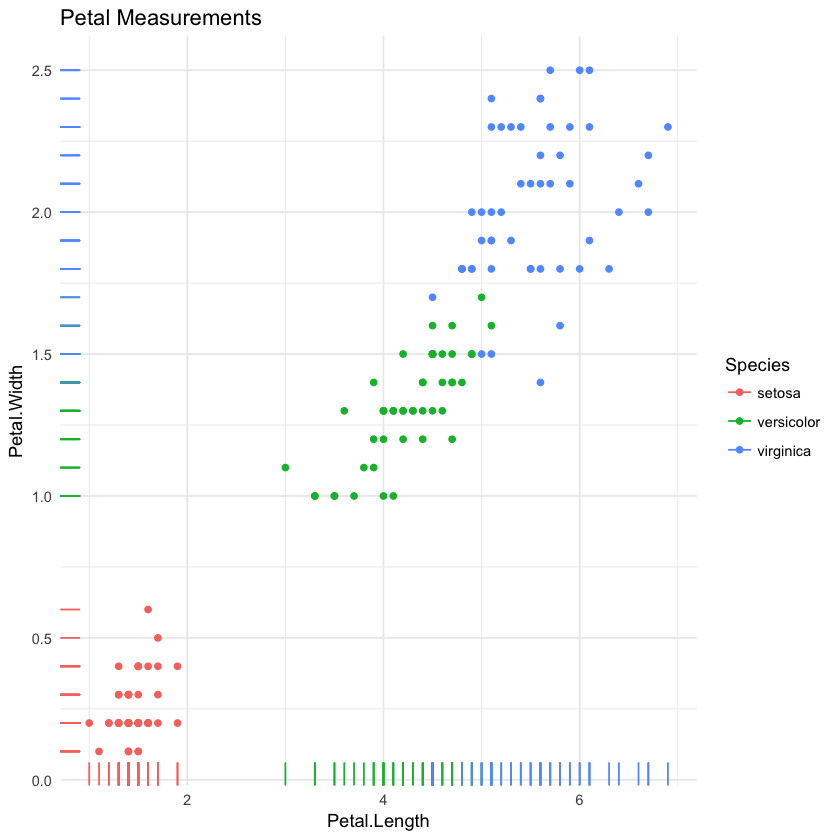

In [6]:
p <- ggplot(data=iris, aes(x=Petal.Length, y=Petal.Width, color=Species))
p + geom_point() + geom_rug()+ theme_minimal() + ggtitle("Petal Measurements")

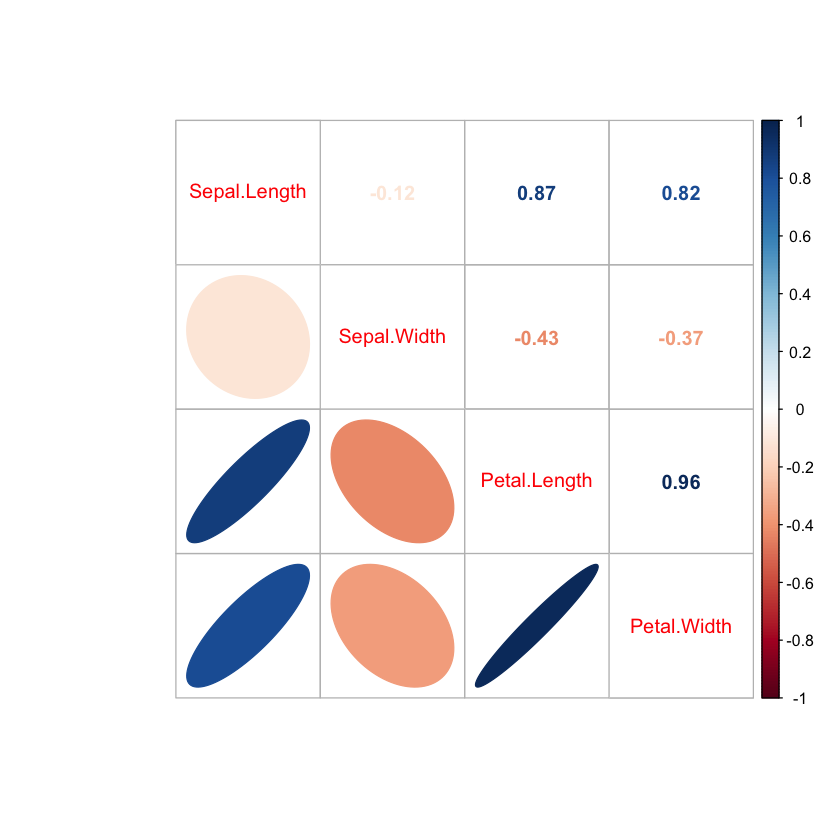

In [7]:
## and this one shows the correlation between the features (input variables)
corrplot.mixed(cor(iris[,-5]), lower="ellipse", upper="number")

### Training and Testing Sets

`set.seed()` is just for setting parameter for the random generatior.
> Different parameter will yield different random numbers. Due to date are intrinsically various, by using date as parameter can easily avoid using same parameter.

In [8]:
# set random seed
set.seed(20180730)

Using indexing `[]` to extract data: `dataframe[row, col]`
> Example:
`dataframe[1:10,]`: Select row index from 1 to 10, include all the columns.
`dataFrame[,5]`: Select only the 5th column data from all record.

`sample()`: sampling the specified size from the elements of x using either with or without replacement.
> `sample(x, size, replace = FALSE, prob = NULL)`
    a. `x`  a vector of one or more elements from which to choose
    b. `size`: default is the number of items inferred from `x`

In [9]:
# permute iris, shuffle or mix them up
iris <- iris[sample(1:nrow(iris),nrow(iris)),]

In [34]:
dim(iris)

[1] 150   5

In [35]:
# create  training and testing subsets:
train.index = 1:100
train.data <- iris[train.index, -5] # grab the first 100 records, leave out the species (last column 5)
train.label <- iris[train.index, 5] # grab the first 100 records of the species
test.data <- iris[-train.index, -5] # (discard the first 100 record) grab the last 50 records, leave out the species (last column 5)
test.label <- iris[-train.index, 5] # grab the last 50 records of the species

In [36]:
dim(train.data) # 100 records
dim(test.data) # 50 records

[1] 100   4

[1] 50  4

In [37]:
head(iris) # the shuffled records

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
16,5.7,4.4,1.5,0.4,setosa
32,5.4,3.4,1.5,0.4,setosa
61,5.0,2.0,3.5,1.0,versicolor
40,5.1,3.4,1.5,0.2,setosa
48,4.6,3.2,1.4,0.2,setosa
103,7.1,3.0,5.9,2.1,virginica


In [38]:
head(train.data) # the first 100 records without the Species

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
16,5.7,4.4,1.5,0.4
32,5.4,3.4,1.5,0.4
61,5.0,2.0,3.5,1.0
40,5.1,3.4,1.5,0.2
48,4.6,3.2,1.4,0.2
103,7.1,3.0,5.9,2.1


### Majority Vote

In [25]:
# define an auxiliary function that calculates the majority votes (or mode!)
majority <- function(x) {
   uniqx <- unique(x)
   uniqx[which.max(tabulate(match(x, uniqx)))]
}

### KNN Classifier

In [39]:
train.len <- nrow(train.data) # 100 records
test.len <- nrow(test.data) # 50 records

`dist()`: computes and returns the distance matrix computed by using the specified distance measure to compute the distances between the rows of a data matrix.
> `dist(x, method = "euclidean", diag = FALSE, upper = FALSE, p = 2)`  
    `x`: numeric matrix.  
    `method`: the distance measure to be used. "euclidean", "maximum", "manhattan", "canberra", "binary" or "minkowski".  

`rbind(...)`: Take a sequence of vector, matrix or data-frame arguments and combine by rows.  
`cbind(...)`: Take a sequence of vector, matrix or data-frame arguments and combine by columns.

In [16]:
temp <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))
dist <- temp[1:test.len, (test.len+1):(test.len + train.len)]

In [17]:
temp

,136,129,63,14,94,95,34,24,50,80,⋯,82,131,134,89,118,11,55,110,41,149
136,0.0000000,1.4212670,3.1032241,6.4342832,4.1605288,3.0182777,5.7253821,5.4267854,5.8206529,3.5510562,⋯,3.5566838,0.5385165,1.9078784,3.0675723,1.0049876,5.5991071,2.0904545,0.8062258,5.8804762,1.7029386
129,1.4212670,0.0000000,2.0712315,5.3572381,2.9512709,1.8027756,4.9010203,4.4395946,4.8435524,2.4799194,⋯,2.4062419,1.1357817,0.7874008,1.8894444,1.9773720,4.7148701,1.1704700,1.3000000,4.9173163,0.6928203
63,3.1032241,2.0712315,0.0000000,3.5707142,1.2247449,0.7348469,3.4132096,2.7495454,3.1000000,0.7071068,⋯,0.6164414,2.7459060,1.3820275,0.9486833,3.7656341,3.0822070,1.1045361,3.1717503,3.2357379,2.2649503
14,6.4342832,5.3572381,3.5707142,0.0000000,2.5748786,3.5818989,1.7262677,1.1180340,0.8246211,2.9478806,⋯,3.0610456,6.1554854,4.6904158,3.4828150,6.9260378,1.3674794,4.3692105,6.2872888,0.9055385,5.2057660
94,4.1605288,2.9512709,1.2247449,2.5748786,0.0000000,1.1916375,2.8478062,1.9544820,2.2912878,0.7874008,⋯,0.6480741,3.8288379,2.3302360,1.2569805,4.7476310,2.4494897,2.1071308,4.0767634,2.4351591,2.9580399
95,3.0182777,1.8027756,0.7348469,3.5818989,1.1916375,0.0000000,3.3630343,2.7386128,3.1256999,0.7745967,⋯,0.6633250,2.6870058,1.1618950,0.3162278,3.5608988,3.0886890,1.0099505,2.9017236,3.2264532,1.8138357
34,5.7253821,4.9010203,3.4132096,1.7262677,2.8478062,3.3630343,0.0000000,1.0723805,1.0295630,2.7658633,⋯,3.0282008,5.5272054,4.2402830,3.1543621,6.0901560,0.5196152,3.8587563,5.5344376,0.8717798,4.6411206
24,5.4267854,4.4395946,2.7495454,1.1180340,1.9544820,2.7386128,1.0723805,0.0000000,0.4358899,2.0832667,⋯,2.2847319,5.1826634,3.7749172,2.5961510,5.9076222,0.6164414,3.4088121,5.2782573,0.5000000,4.2602817
50,5.8206529,4.8435524,3.1000000,0.8246211,2.2912878,3.1256999,1.0295630,0.4358899,0.0000000,2.4556058,⋯,2.6438608,5.5668663,4.1617304,2.9916551,6.2952363,0.5744563,3.7986840,5.6841886,0.2449490,4.6754679
80,3.5510562,2.4799194,0.7071068,2.9478806,0.7874008,0.7745967,2.7658633,2.0832667,2.4556058,0.0000000,⋯,0.3464102,3.2403703,1.7916473,0.7874008,4.1376322,2.4372115,1.4628739,3.5014283,2.5748786,2.4879711


In [18]:
dist

,16,32,61,40,48,103,128,37,124,70,⋯,82,131,134,89,118,11,55,110,41,149
136,5.5434646,5.4972721,4.0914545,5.7000000,6.0124870,0.6633250,2.0615528,5.7043843,1.9339080,3.3075671,⋯,3.5566838,0.5385165,1.9078784,3.0675723,1.0049876,5.5991071,2.0904545,0.8062258,5.8804762,1.7029386
129,4.7696960,4.5891176,2.8670542,4.7402532,4.9648766,0.7874008,0.8426150,4.8373546,0.7745967,2.1494185,⋯,2.4062419,1.1357817,0.7874008,1.8894444,1.9773720,4.7148701,1.1704700,1.3000000,4.9173163,0.6928203
63,3.3970576,2.9000000,1.1357817,3.0232433,3.2186954,2.5826343,1.4491377,3.1416556,1.3379088,0.5196152,⋯,0.6164414,2.7459060,1.3820275,0.9486833,3.7656341,3.0822070,1.1045361,3.1717503,3.2357379,2.2649503
14,2.0420578,1.2727922,2.8390139,0.9848858,0.4795832,5.9059292,4.5354162,1.3190906,4.6281746,3.2832910,⋯,3.0610456,6.1554854,4.6904158,3.4828150,6.9260378,1.3674794,4.3692105,6.2872888,0.9055385,5.2057660
94,2.9154759,2.2293497,0.3605551,2.2583180,2.2847319,3.5874782,2.2135944,2.5159491,2.2472205,0.8774964,⋯,0.6480741,3.8288379,2.3302360,1.2569805,4.7476310,2.4494897,2.1071308,4.0767634,2.4351591,2.9580399
95,3.3166248,2.9376862,1.1958261,3.0397368,3.2093613,2.4228083,1.0392305,3.2046841,1.1090537,0.4123106,⋯,0.6633250,2.6870058,1.1618950,0.3162278,3.5608988,3.0886890,1.0099505,2.9017236,3.2264532,1.8138357
34,0.3605551,0.8366600,3.1843367,0.9000000,1.3453624,5.2782573,4.0755368,0.7071068,4.2071368,3.1559468,⋯,3.0282008,5.5272054,4.2402830,3.1543621,6.0901560,0.5196152,3.8587563,5.5344376,0.8717798,4.6411206
24,1.2727922,0.3872983,2.2781571,0.3741657,0.6633250,4.9284886,3.6083237,0.6708204,3.7054015,2.4677925,⋯,2.2847319,5.1826634,3.7749172,2.5961510,5.9076222,0.6164414,3.4088121,5.2782573,0.5000000,4.2602817
50,1.3228757,0.4690416,2.5961510,0.1732051,0.4123106,5.3254108,4.0137264,0.5477226,4.1060930,2.8390139,⋯,2.6438608,5.5668663,4.1617304,2.9916551,6.2952363,0.5744563,3.7986840,5.6841886,0.2449490,4.6754679
80,2.7568098,2.2561028,0.9219544,2.3748684,2.5729361,3.0149627,1.7088007,2.5159491,1.7233688,0.4358899,⋯,0.3464102,3.2403703,1.7916473,0.7874008,4.1376322,2.4372115,1.4628739,3.5014283,2.5748786,2.4879711


In [29]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    temp <- as.matrix(dist(rbind(test.data, train.data), method= distance))
    dist <- temp[1:test.len, (test.len+1):(test.len + train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i]<- (majority(train.label[nn]))
    }
    
    ## return the class labels as output
    return (test.label)
}

In [30]:
# let see what is the prediciton of our knn for test samples when K=4
knn(train.data, train.label, test.data, K=4)

[1] virginica  versicolor setosa     setosa     setosa     versicolor
 [7] setosa     virginica  setosa     versicolor versicolor versicolor
[13] versicolor virginica  setosa     versicolor setosa     virginica 
[19] setosa     virginica  versicolor setosa     virginica  setosa    
[25] setosa     setosa     versicolor versicolor setosa     setosa    
[31] setosa     virginica  virginica  virginica  setosa     virginica 
[37] versicolor virginica  virginica  virginica  virginica  versicolor
[43] virginica  setosa     versicolor setosa     virginica  versicolor
[49] versicolor setosa    
Levels: setosa versicolor virginica

In [31]:
# and a confusion matrix for K = 5
prop.table(table(knn(train.data, train.label, test.data, K=5), test.label))*100

            test.label
             setosa versicolor virginica
  setosa         38          0         0
  versicolor      0         30         0
  virginica       0          2        30

In [33]:
# calculate the train and test missclassification rates for K in 1:100 
# THIS MAY TAKE A FEW MINUTES TO COMPLETE!
miss <- data.frame('K'=1:100, 'train'=rep(0,100), 'test'=rep(0,100))
for (k in 1:100){
    miss[k,'train'] <- sum(knn(train.data, train.label, train.data, K=k) != train.label)/nrow(train.data)*100
    miss[k,'test'] <-  sum(knn(train.data, train.label, test.data, K=k)  != test.label)/nrow(test.data)*100
}

### Misclassification percentage

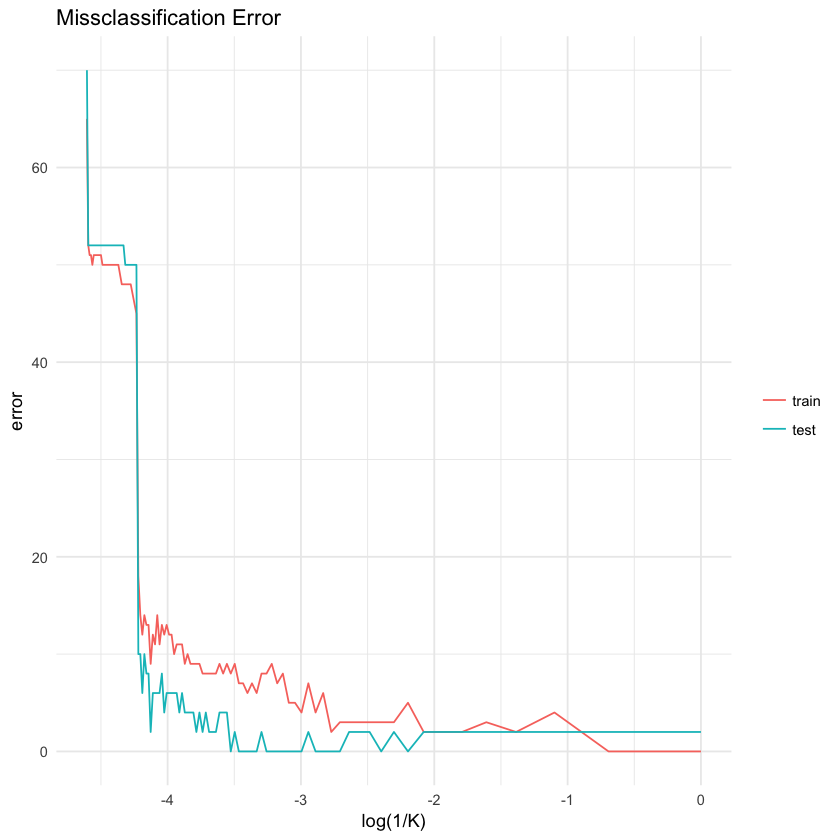

In [34]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=log(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

# Discussions

As $K$ increases, does the complexity of the KNN classifier increase or decrease?

What is the relationship between $1/K$ and the training error?

What is the relationship between $1/K$ and the testing error?

How do you explain the difference between training and testing error trends as the complexity of the KNN classifier increases?

Can you tell the areas where the model overfits and underfits? What is the best value for $K$?